In [1]:
from nodes.nodes import FoldiakNode, InputNode
from nodes.net import FoldiakShapedNet
from nodes.layer import ShapedLayer

import random
import matplotlib.pyplot as plt

random.seed(42)

inputlayer = ShapedLayer((8,8))
foldiaklayer = ShapedLayer(16)

foldiaklayer.fillnodes(FoldiakNode)
inputlayer.fillnodes(InputNode)
    
network = FoldiakShapedNet()
network.append(inputlayer)
network.append(foldiaklayer)
network.connect_foldiak(inputlayer, foldiaklayer)

network.setparam("a",0.01)
network.setparam("b",0.001)
network.setparam("y",0.01)
network.setparam("p",1.0/8)
network.setparam("l",10)

In [2]:
import numpy as np
samples = np.loadtxt("../data/lines_noisy.csv")

network.setup()

In [3]:
#Steady state thres:
network.setparam("a",0.0)
network.setparam("b",0.0)
network.setparam("y",0.5)
for i in range(200):
    for i in inputlayer.nodes:
        i.setvalstored(random.uniform(0,1))
    network.update()

In [6]:
import time
deltas = []

for i in range(100):
    t0 = time.clock()
    network.update()
    t1 = time.clock()
    deltas.append(t1-t0)
print(sum(deltas)/len(deltas))

0.10752296199999818


In [4]:
network.setparam("a",0.01)
network.setparam("b",0.001)
network.setparam("y",0.01)

outnum = 5000
innum = 5
count = 0

for i in range(outnum):
    for j in range(len(inputlayer.nodes)):
        inputlayer.nodes[j].setvalstored(samples[i,j])
    for j in range(innum):
        network.update()
    count += innum
    if ((count%1000)==0):
        print(str(count)+"/"+str(innum*outnum))

1000/25000


KeyboardInterrupt: 

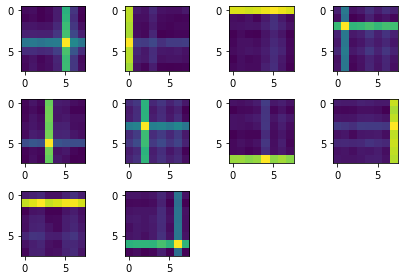

In [7]:
fig=plt.figure()

for node_num in range(len(foldiaklayer.nodes)):

    testbias = []

    for node in inputlayer.nodes:
        for i in network.connects:
            if (i.input is node) and (i.output is foldiaklayer.nodes[node_num]):
                testbias.append(i.bias)
    fig.add_subplot(3,4,node_num+1)
            
    plt.imshow(np.array(testbias).reshape((8,8)))
fig.tight_layout()
plt.savefig("2020_07_03_bias_figure.png")
plt.show()

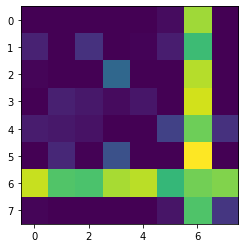

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [8]:
samplenum = 30
plt.imshow(samples[samplenum,:].reshape((8,8)))
plt.savefig("2020_07_03_sample_ex.png")
plt.show()
for i in range(8*8):
    inputlayer.nodes[i].setvalstored(samples[samplenum,i])
network.update()
output = []
for i in foldiaklayer.nodes:
    output.append(i.returnval())
output